### load data gelombang

In [1]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (10, 6)

In [2]:
# membaca data
import netCDF4 as nc4
nc_interim = nc4.Dataset('swh_indo_0817_0819.nc', 'r')
#nc_interim.variables

In [3]:
# set to variable
lon_interim = nc_interim.variables['longitude'][:]
lat_interim = nc_interim.variables['latitude'][:]
time_interim = nc_interim.variables['time'][:]
swh_interim = nc_interim.variables['swh'][:]

print('== Shape of Variables ===')
print('longitude: ', lon_interim.shape)
print('latitude: ', lat_interim.shape)
print('time: ', time_interim.shape)
print('swh: ', swh_interim.shape)

== Shape of Variables ===
longitude:  (401,)
latitude:  (121,)
time:  (4384,)
swh:  (4384, 121, 401)


In [4]:
# convert to dataframe
import numpy as np
import pandas as pd

lon_interim = pd.DataFrame(lon_interim, columns=['longitude']).set_index(np.arange(0,401,1)).astype('float32')
lat_interim = pd.DataFrame(lat_interim, columns=['latitude']).set_index(np.arange(0,121,1)).astype('float32')

display(lon_interim.head())
display(lat_interim.head())

,longitude
0,100.000
1,100.125
2,100.250
3,100.375
4,100.500


,latitude
0,5.000
1,4.875
2,4.750
3,4.625
4,4.500


In [5]:
# convert to dataframe, and then to datetime
time_interim = pd.DataFrame(time_interim, columns=['waktu'], dtype='int64')
time_interim['waktu'] = pd.to_datetime(time_interim['waktu'], unit='h', origin=pd.Timestamp('1900-01-01 00:00:00'))

display(time_interim.head())
display(time_interim.tail())

,waktu
0,2016-08-31 00:00:00
1,2016-08-31 06:00:00
2,2016-08-31 12:00:00
3,2016-08-31 18:00:00
4,2016-09-01 00:00:00


,waktu
4379,2019-08-30 18:00:00
4380,2019-08-31 00:00:00
4381,2019-08-31 06:00:00
4382,2019-08-31 12:00:00
4383,2019-08-31 18:00:00


In [6]:
hmax_interim = 2 * swh_interim

In [7]:
# 1
print("Cilacap")
display(lat_interim[lat_interim['latitude'] == np.round(-7.833)]) # Dibulatkan sesuai nilai latitude di gridnya 
display(lon_interim[lon_interim['longitude'] == np.round(108.97)])

# 2
print("\nPangandaran")
display(lat_interim[lat_interim['latitude'] == np.round(-7.83)])
display(lon_interim[lon_interim['longitude'] == np.round(108.53)])

# 3
print("\nIndramayu")
display(lat_interim[lat_interim['latitude'] == np.round(-6.17)])
display(lon_interim[lon_interim['longitude'] == np.round(108.4)])

# 4
print("\nPelabuhan Karang Ratu")
display(lat_interim[lat_interim['latitude'] == np.round(-5.9)])
display(lon_interim[lon_interim['longitude'] == np.round(106.2)])

Cilacap


,latitude
104,-8.0


,longitude
72,109.0



Pangandaran


,latitude
104,-8.0


,longitude
72,109.0



Indramayu


,latitude
88,-6.0


,longitude
64,108.0



Pelabuhan Karang Ratu


,latitude
88,-6.0


,longitude
48,106.0


In [8]:
hmax_interim_cilacap = pd.DataFrame(hmax_interim[:,104,72], columns=['Cilacap']).set_index(time_interim['waktu'])
hmax_interim_pangandaran = pd.DataFrame(hmax_interim[:,104,72], columns=['Pangandaran']).set_index(time_interim['waktu'])
hmax_interim_indramayu = pd.DataFrame(hmax_interim[:,88,64], columns=['Indramayu']).set_index(time_interim['waktu'])
hmax_interim_ratu = pd.DataFrame(hmax_interim[:,88,48], columns=['Pelabuhan Karang Ratu']).set_index(time_interim['waktu'])

print(hmax_interim_ratu.shape)
hmax_interim_ratu.head()

(4384, 1)


,Pelabuhan Karang Ratu
waktu,
2016-08-31 00:00:00,1.213088
2016-08-31 06:00:00,1.237027
2016-08-31 12:00:00,1.260361
2016-08-31 18:00:00,1.246270
2016-09-01 00:00:00,1.244906


In [14]:
hmax_interim_cilacap['Cilacap'].to_csv('hmax_interim_cilacap.csv')
hmax_interim_pangandaran['Pangandaran'].to_csv('hmax_interim_pangandaran.csv')
hmax_interim_indramayu['Indramayu'].to_csv('hmax_interim_indramayu.csv')
hmax_interim_ratu['Pelabuhan Karang Ratu'].to_csv('hmax_interim_karangantu.csv')

### Test

In [1]:
'''# import library
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages

base = importr('base')
utils = importr('utils')
utils.chooseCRANmirror(ind=1)
utils.install_packages('POT') #installing POT package
'''

rpy2.rinterface.NULL

### Threshold Selection

In [27]:
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams["font.weight"] = "bold"
rcParams["axes.labelweight"] = "bold"

rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.labelweight'] = 'bold'
rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

rcParams['legend.fontsize'] = 16

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.it'] = 'STIXGeneral:italic'
rcParams['mathtext.bf'] = 'STIXGeneral:italic:bold'

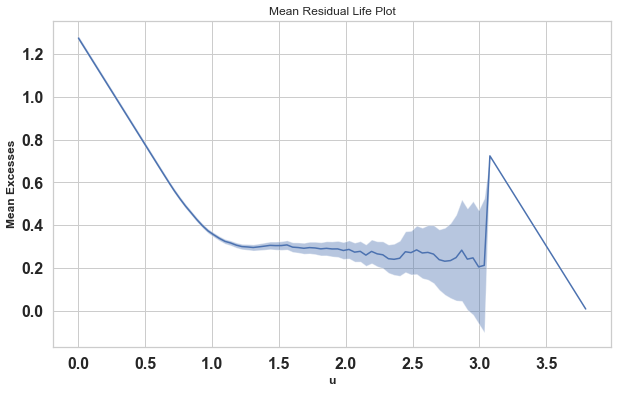

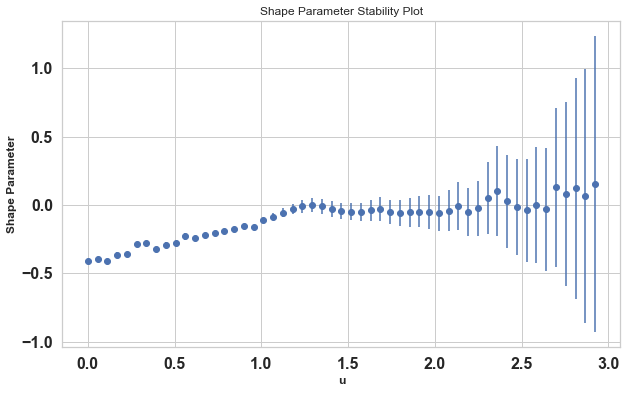

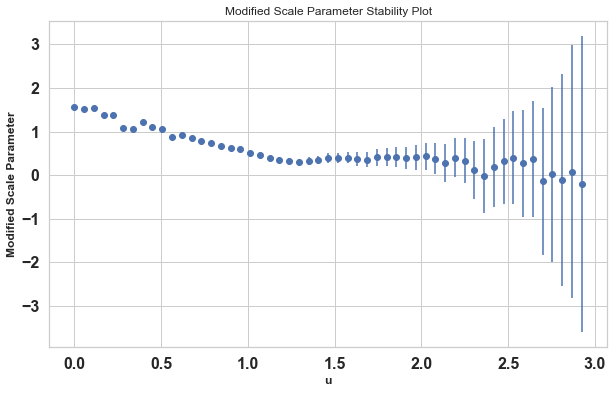

In [54]:
from thresholdmodeling import thresh_modeling #importing package
import pandas as pd #importing pandas

#url = 'https://raw.githubusercontent.com/iagolemos1/thresholdmodeling/master/dataset/rain.csv' #saving url
#df =  pd.read_csv(url, error_bad_lines=False) #getting data
#data = df.values.ravel() #turning data into an array
data = hmax_interim_ratu['Pelabuhan Karang Ratu'].values.ravel() #turning data into an array

thresh_modeling.MRL(data, 0.05) # confidence level 95%
thresh_modeling.Parameter_Stability_plot(data, 0.05)

Dari tiga grafik diatas, maka dapat ditentukan nilai **threshold** sebesar **5 m** (Cilacap dan Pangandaran), **2 m** (Indramayu).

### Model Fit
Setelah menentukan nilai thresholdnya, selajutnya dataset akan di fit ke model **Generelized Pareto Distribution (GPD)**, yang dalam hal ini menggunakan fungsi `gpdfit` dan menggunakan metode **maximum likelihood estimation**.

In [55]:
thresh_modeling.gpdfit(data, 2, 'mle')

Estimator: MLE 

 Deviance: -82.55663 

      AIC: -78.55663 



Varying Threshold: FALSE 



  Threshold Call: 2L 

    Number Above: 164 

Proportion Above: 0.0374 



Estimates

   scale     shape  

 0.30303  -0.05778  



Standard Error Type: observed 



Standard Errors

  scale    shape  

0.03075  0.06499  



Asymptotic Variance Covariance

       scale       shape     

scale   0.0009458  -0.0013805

shape  -0.0013805   0.0042237



Optimization Information

  Convergence: successful 

  Function Evaluations: 19 

  Gradient Evaluations: 6 





(-0.057779599763527555,
 0.3030292725450618,
 array([0.60852862, 0.63716562, 0.63883232, ..., 3.07252275, 3.07661375,
        3.80253897]),
 [0.0005292396323315351,
  0.0011353137022847015,
  0.0014383507372608406,
  0.002802017394655021,
  0.004771758122001923,
  0.005529350709443381,
  0.0076506099542785755,
  0.008105165506743006,
  0.014771980276225172,
  0.017953869143477963,
  0.020075128388313157,
  0.02204486911566006,
  0.02340853577305424,
  0.02522675798291285,
  0.030681424612489128,
  0.03159053571741843,
  0.03371179496225363,
  0.03371179496225363,
  0.03583305420708882,
  0.03583305420708882,
  0.04386353563396472,
  0.045833276361311626,
  0.04810605412363511,
  0.04992427633349372,
  0.052954646683258666,
  0.057651720725393485,
  0.0584093133128345,
  0.06250031328501704,
  0.06856105398454604,
  0.06886409101952262,
  0.06947016508947534,
  0.06962168360696364,
  0.07128838729933396,
  0.07295509099170472,
  0.07886431317374543,
  0.07886431317374543,
  0.0843189798

### Model Checking
Setelah mendefinisikan model GPD, selanjutnya memverifikasi model apakah hasilnya reasonable dan benar2 mendeskripsikan kondisi sebenarnya. Untuk mengetahuinya, dapat dibuat plot:
- probability density function
- cumulative distribution function
- quantile-quantile
- probability-probability

Tindakan plot diatas dapat dibuat dengan menggunakan fungsi `gpdpdf`, `gpdcdf`, `qqplot`, dan `ppplot`.

Estimator: MLE 

 Deviance: -82.55663 

      AIC: -78.55663 



Varying Threshold: FALSE 



  Threshold Call: 2L 

    Number Above: 164 

Proportion Above: 0.0374 



Estimates

   scale     shape  

 0.30303  -0.05778  



Standard Error Type: observed 



Standard Errors

  scale    shape  

0.03075  0.06499  



Asymptotic Variance Covariance

       scale       shape     

scale   0.0009458  -0.0013805

shape  -0.0013805   0.0042237



Optimization Information

  Convergence: successful 

  Function Evaluations: 19 

  Gradient Evaluations: 6 





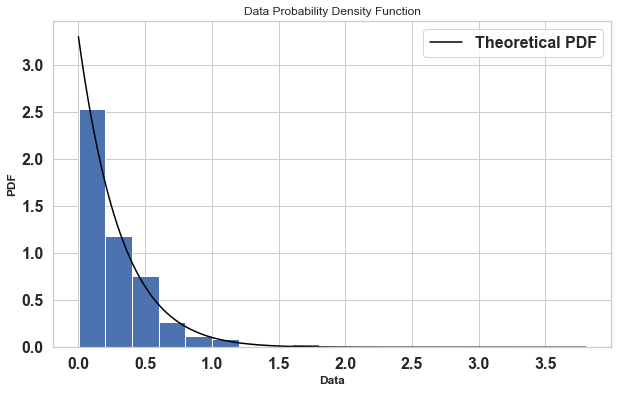

Estimator: MLE 

 Deviance: -82.55663 

      AIC: -78.55663 



Varying Threshold: FALSE 



  Threshold Call: 2L 

    Number Above: 164 

Proportion Above: 0.0374 



Estimates

   scale     shape  

 0.30303  -0.05778  



Standard Error Type: observed 



Standard Errors

  scale    shape  

0.03075  0.06499  



Asymptotic Variance Covariance

       scale       shape     

scale   0.0009458  -0.0013805

shape  -0.0013805   0.0042237



Optimization Information

  Convergence: successful 

  Function Evaluations: 19 

  Gradient Evaluations: 6 





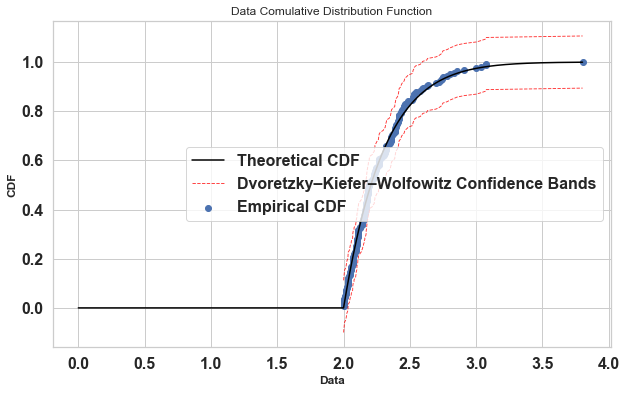

Estimator: MLE 

 Deviance: -82.55663 

      AIC: -78.55663 



Varying Threshold: FALSE 



  Threshold Call: 2L 

    Number Above: 164 

Proportion Above: 0.0374 



Estimates

   scale     shape  

 0.30303  -0.05778  



Standard Error Type: observed 



Standard Errors

  scale    shape  

0.03075  0.06499  



Asymptotic Variance Covariance

       scale       shape     

scale   0.0009458  -0.0013805

shape  -0.0013805   0.0042237



Optimization Information

  Convergence: successful 

  Function Evaluations: 19 

  Gradient Evaluations: 6 





C:\Users\titan\anaconda3\lib\site-packages\thresholdmodeling\thresh_modeling.py:194: RuntimeWarning: invalid value encountered in double_scalars
  CI_qq_high.append(threshold + ((scale/shape)*(((1-((F2)/(1)))**-shape) - 1)))


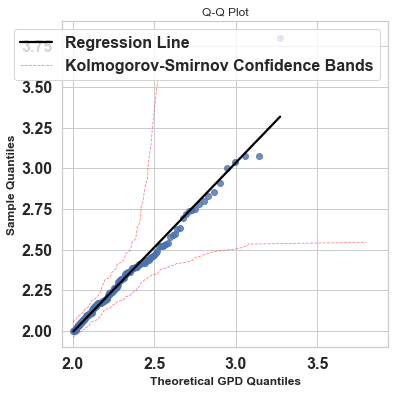

Estimator: MLE 

 Deviance: -82.55663 

      AIC: -78.55663 



Varying Threshold: FALSE 



  Threshold Call: 2L 

    Number Above: 164 

Proportion Above: 0.0374 



Estimates

   scale     shape  

 0.30303  -0.05778  



Standard Error Type: observed 



Standard Errors

  scale    shape  

0.03075  0.06499  



Asymptotic Variance Covariance

       scale       shape     

scale   0.0009458  -0.0013805

shape  -0.0013805   0.0042237



Optimization Information

  Convergence: successful 

  Function Evaluations: 19 

  Gradient Evaluations: 6 





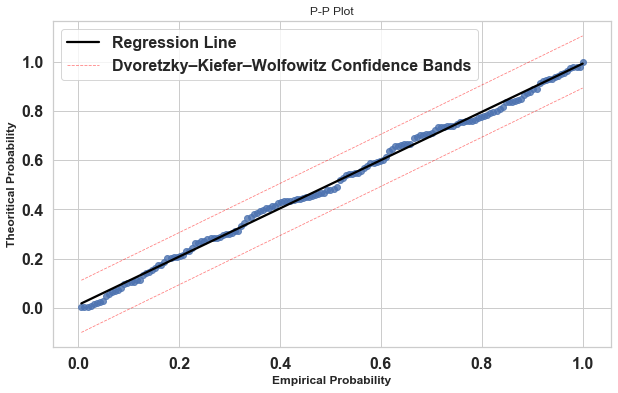

In [56]:
thresh_modeling.gpdpdf(data, 2, 'mle', 'sturges', 0.05)
thresh_modeling.gpdcdf(data, 2, 'mle', 0.05)
thresh_modeling.qqplot(data, 2, 'mle', 0.05)
thresh_modeling.ppplot(data, 2, 'mle', 0.05)

Setelah diketahui bahwa model dapat mendeskripsikan kondisi sebenarnya dengan baik, selanjtunya melakukan analisis **extreme values**, dan mencari **return period**.

### Return Value Analysis
Dalam menganalisis return period, perlu diperhatikan unitnya, apakah dalam jam, hari, atau bulan. Dalam study case ini, unit yg digunakan adalah harian.

Untuk mendapatkan return value, dapat dilakukan dengan menjalankan fungsi `return_value`, dengan menggunakan fungsi tersebut, dapat diperoleh:
- return value dan return period
- return value plot

Code dibawah ini digunakan untuk mencari return period hingga 100 tahun atau 36500 hari.

The return value for the given return period is 3.2457262827251934 ± 0.25947466324665946


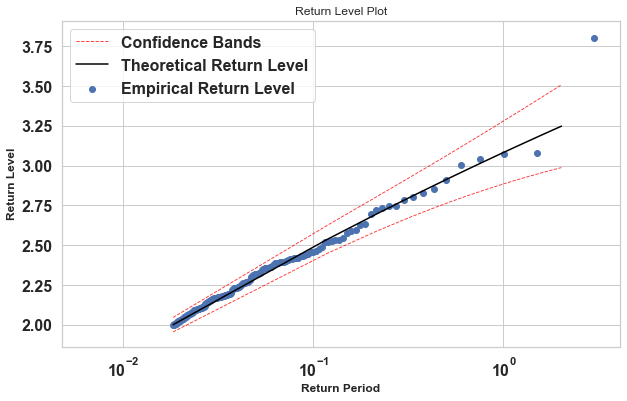

In [62]:
thresh_modeling.return_value(data, 2, 0.05, 365*4, 365*2*4, 'mle') # disini akan dianalisis per annual, karena interval datanya per 6 jam, maka dalam 1 tahun akan ada 4*365 data

Berdasarkan grafik diatas, dapat dilihat bahwa model mampu mem-fit data observasi dengan baik, sehingga dapat dilakukan untuk mencari return value dengan return period hingga 100 tahun. 

Analisis yang didapatkan dari hasil ini adalah, *presipitasi hujan* per 100 tahun sekali akan berada pada rentang 65,4470 dan 147,2108 mm.

### Referensi